In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Open the dataset
df = pd.read_csv("vgsales.csv")

In [3]:
df.head(30)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# size of dataset
df.size

267504

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
# Missing Values
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

# TOP 5 Publisher by Global Sales

In [9]:
# Filter games without name
empty_name_rows = df[df['Name'].isna() | (df['Name'] == '')]

empty_name_rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[df["Publisher"] == "Nintendo"]["Global_Sales"].sum()

1788.81

In [11]:
first_year_by_publisher = df.groupby("Publisher")["Year_of_Release"].min()

publishers_of_interest = [
    "Nintendo",
    "Electronic Arts",
    "Activision",
    "Sony Computer Entertainment",
    "Ubisoft"
]

filtered_first_year = first_year_by_publisher[first_year_by_publisher.index.isin(publishers_of_interest)]

print(filtered_first_year)

Publisher
Activision                     1980.0
Electronic Arts                1992.0
Nintendo                       1983.0
Sony Computer Entertainment    1994.0
Ubisoft                        1995.0
Name: Year_of_Release, dtype: float64


In [12]:
df["Year_of_Release"].max()

2020.0

In [13]:
df["Publisher"] = df['Publisher'].fillna('Unknown')

In [14]:
# Group by Publisher and add global sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum()

# sort the values from greater to lower
top_5_publishers = top_publishers.sort_values(ascending=False).head(5)

print(top_5_publishers)

rounded_top_5_publishers = top_5_publishers.round().astype(int)

print(rounded_top_5_publishers)

Publisher
Nintendo                       1788.81
Electronic Arts                1116.96
Activision                      731.16
Sony Computer Entertainment     606.48
Ubisoft                         471.61
Name: Global_Sales, dtype: float64
Publisher
Nintendo                       1789
Electronic Arts                1117
Activision                      731
Sony Computer Entertainment     606
Ubisoft                         472
Name: Global_Sales, dtype: int32


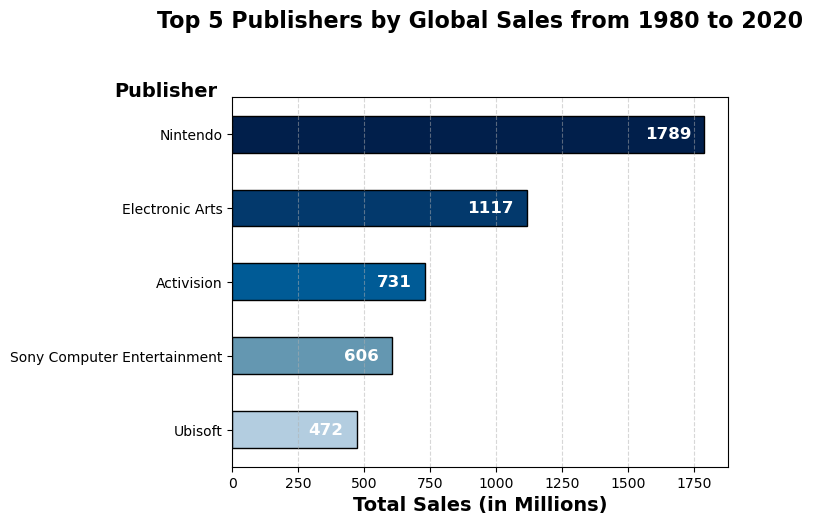

In [15]:
hex_colors = ["#011f4b", "#03396c", "#005b96", "#6497b1", "#b3cde0"]

# Create a horizontal bar chart of the top 5 publishers by global sales and edgecolor is used to outline the bars with black borders
ax = rounded_top_5_publishers.head(5).plot(kind='barh', color=hex_colors, edgecolor="black")

# Add labels on each bar showing the exact sales values
for i, v in enumerate(rounded_top_5_publishers):
    ax.text(v - 50, i, str(round(v, 2)), color='white', ha='right', va='center', 
            fontsize=12, fontweight='bold')

# Set the title and X-axis label of the chart
plt.title('Top 5 Publishers by Global Sales from 1980 to 2020', fontsize=16, fontweight='bold', pad=50)
plt.xlabel('Total Sales (in Millions)', fontsize=14, fontweight='bold')
ax.set_ylabel("")

plt.text(-max(rounded_top_5_publishers) * 0.25, -0.5, "Publisher", fontsize=14, fontweight='bold')


# Invert the Y-axis so the publisher with the highest sales appears at the top
plt.gca().invert_yaxis()
# Add a light dashed grid to the X-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)
# Format the axis label positions and font sizes
ax.yaxis.label.set_position((100, 1))
ax.yaxis.label.set_rotation(0)
ax.yaxis.label.set_fontsize(14)
ax.xaxis.label.set_fontsize(14)
plt.show()

# Na_sales & eu_sales Correlation

In [17]:
# Make a copy of original dataset
df2 = df.copy()

df2 = df2.dropna(subset=["Year_of_Release"])
df2 = df2.rename(columns={"Global_Sales": "Global Sales"})
df2["Year_of_Release"] = df2["Year_of_Release"].astype(int)
#Filter by year
df_sales = df2[(df2["Year_of_Release"] >= 2010) & (df["Year_of_Release"] <= 2014)]

# Calculate correlation for each year
correlations = {}
for year in df_sales['Year_of_Release'].unique():
    year_data = df_sales[df_sales['Year_of_Release'] == year]
    correlation = year_data['NA_Sales'].corr(year_data['EU_Sales'])
    correlations[year] = correlation

C:\Users\anton\AppData\Local\Temp\ipykernel_8856\3157476764.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sales = df2[(df2["Year_of_Release"] >= 2010) & (df["Year_of_Release"] <= 2014)]


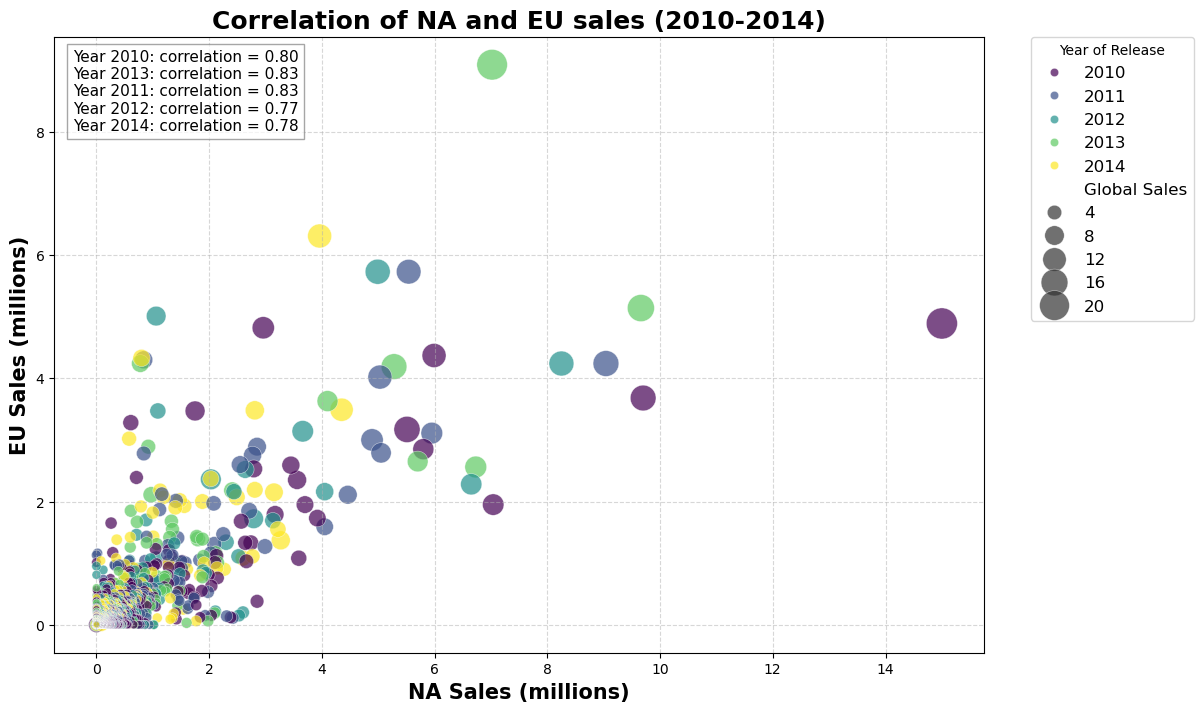

In [18]:
# Bubble Chart
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_sales,
    x="NA_Sales",
    y="EU_Sales",
    size="Global Sales",  # Size of bubbles based on Global_Sales
    hue="Year_of_Release",  # Color of bubbles based on Year_of_Release
    alpha=0.7,
    sizes=(20, 500),
    palette="viridis"
)

# Add a bold, larger title to the chart
plt.title("Correlation of NA and EU sales (2010-2014)", fontsize=18,fontweight='bold')

# Customize the axis labels with bold fonts
plt.xlabel("NA Sales (millions)", fontsize=15, fontweight='bold')
plt.ylabel("EU Sales (millions)",fontsize=15, fontweight='bold')

# Add a subtle grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Get handles and labels from the scatterplot to customize the legend
handles, labels = scatter.get_legend_handles_labels()

# Create a custom legend only for the hue (year), skipping the first item (size legend)
plt.legend(
    handles=handles[1:],
    labels=labels[1:],
    title="Year of Release",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    fontsize=12
)

# Add correlation values to top-left corner
correlation_text = "\n".join([f"Year {year}: correlation = {corr:.2f}" for year, corr in correlations.items()])
plt.text(
    0.02, 0.98,
    correlation_text,
    transform=plt.gca().transAxes,
    verticalalignment='top',
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.show()

# Distribution of the 3 most popular (by user_score) game genres

In [20]:
df3 = df.copy()

# Drop rows where 'User_Score' is missing (NaN)
df3 = df3.dropna(subset=["User_Score"])

# Convert score values to numeric
df3["User_Score"] = pd.to_numeric(df3["User_Score"], errors="coerce")

# Fill missing values in the 'Genre' column with 'Unknown'
df3["Genre"] = df3["Genre"].fillna('Unknown')

# Group by 'Genre', calculate the average 'User_Score' per genre, and select the top 3 genres with the highest average score
top_genres = df3.groupby("Genre")["User_Score"].mean().nlargest(3)

# Get the genre names (index) of those top 3 genres as a list
top_genre_names = top_genres.index.tolist() 

# Filter the Dataset to include only rows from the top 3 genres and reset the index for a clean Dataset
df_top_genres = df3[df3["Genre"].isin(top_genre_names)].reset_index(drop=True)

# Print the top genre names
print("Top Genres:", top_genre_names)

# Print the unique genre values present in the filtered DataFrame (should match top_genre_names)
print(df_top_genres["Genre"].unique())

Top Genres: ['Role-Playing', 'Fighting', 'Platform']
['Platform' 'Fighting' 'Role-Playing']


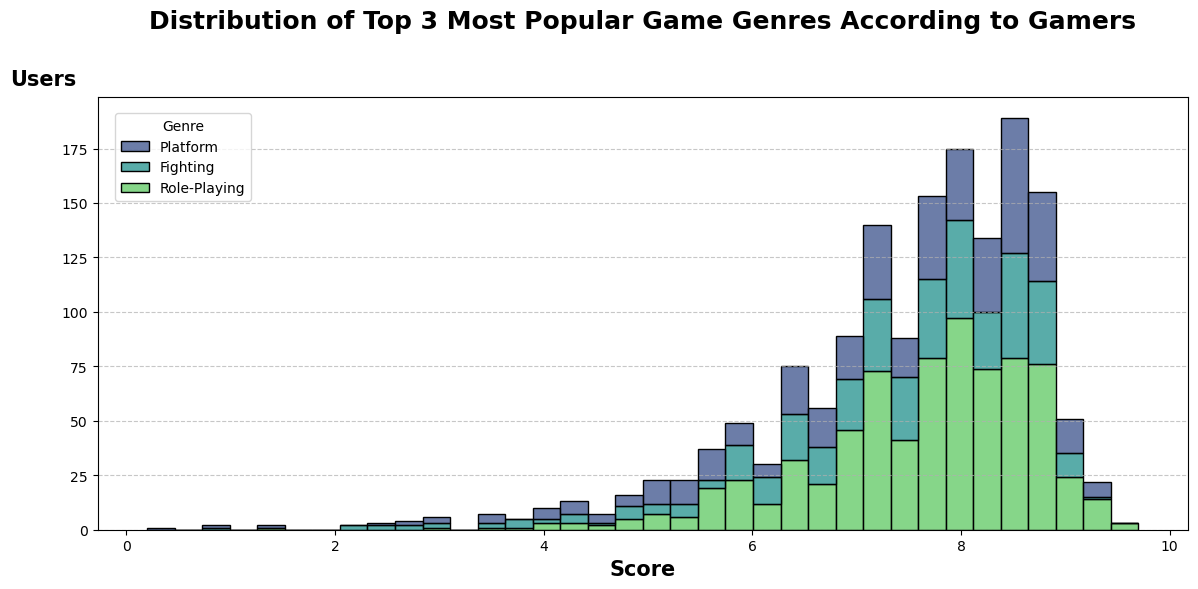

In [21]:
plt.figure(figsize=(12, 6))
# Create a stacked histogram
ax = sns.histplot(
    data=df_top_genres,
    x="User_Score",
    hue="Genre",
    kde=False,
    palette="viridis",
    multiple="stack"
)

# Title and axis labels
plt.title("Distribution of Top 3 Most Popular Game Genres According to Gamers", fontsize=18, pad=50, fontweight='bold')
plt.xlabel("Score", fontsize=15, fontweight='bold')

# Set the Y-axis label: horizontal, placed above the axis
ax.set_ylabel("Users", rotation=0, labelpad=40, fontsize=15, fontweight='bold')
ax.yaxis.set_label_coords(-0.05, 1.02)

# Move the legend inside the plot, top-left corner
ax.legend_.set_bbox_to_anchor((0.01, 0.98))
ax.legend_.set_loc("upper left")
ax.legend_.set_title("Genre")

# Add horizontal gridlines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Do older games (2005 and earlier) have a higher MEDIAN “eu_sales” than newer games (after 2005)?  

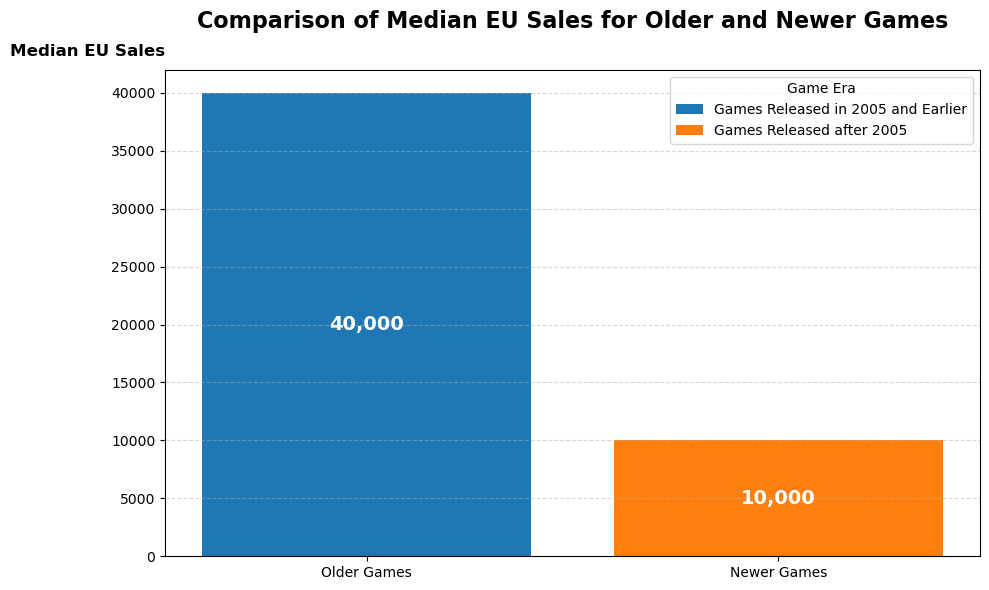

In [23]:
df4 = df.copy()

# Transform 'EU_Sales' to millions
df4['EU_Sales'] = df4['EU_Sales'] * 1000000

# Reset the index of df4 AFTER the transformation
df4 = df4.reset_index(drop=True)

# Filter the games before 2005 from df4 (which now has transformed sales)
older_games = df4[df4["Year_of_Release"] <= 2005]

# Filter the games after 2005 from df4 (which now has transformed sales)
newer_games = df4[df4["Year_of_Release"] > 2005]

# Get the median of EU_Sales for games released in 2005 or earlier
median_older = older_games["EU_Sales"].median()

# Get the median of EU_Sales for games after 2005
median_newer = newer_games["EU_Sales"].median()

labels = ['Older Games', 'Newer Games']
labels2 = ['Games Released in 2005 and Earlier', 'Games Released after 2005']
medians = [median_older, median_newer]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, medians, color=["#1F77B4", "#FF7F0E"])
ax.set_title("Comparison of Median EU Sales for Older and Newer Games", fontsize=16, fontweight='bold', pad=30)

# Get the maximum y-value
max_y = max(medians)

# Set the y-axis label
ax.set_ylabel("Median EU Sales", fontsize=12, fontweight='bold', rotation=0, ha='right', va='top', labelpad=20)

# Adjust the y-axis label position
ax.yaxis.set_label_coords(0, max_y / (ax.get_ylim()[1] - ax.get_ylim()[0]) + 0.1)

ax.legend(bars, labels2, title="Game Era")
ax.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2,  # Position in the middle of the bar vertically
            f'{yval:,.0f}',  # Format with commas and no decimal places
            ha='center', va='center', color='white',fontsize=14,fontweight='bold' ) # Center alignment and white color
plt.tight_layout() 
plt.show()


# What are the 3 most common “developer” in the dataset? 

In [25]:
df5 = df.copy()
df5 = df5.dropna(subset=["Developer"])

df5.isnull().sum()

Name                  0
Platform              0
Year_of_Release     189
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1965
Critic_Count       1965
User_Score          114
User_Count         2517
Developer             0
Rating              146
dtype: int64

In [26]:
df5.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [27]:
df5["Developer"].nunique()

1696

In [28]:
df5["Developer"].isnull().sum()

0

In [29]:
common_developers = df5['Developer'].value_counts()

top_3_developers = common_developers.head(10)

common_developers.head(10)

Developer
Ubisoft             204
EA Sports           172
EA Canada           167
Konami              162
Capcom              139
EA Tiburon          108
Electronic Arts     104
Ubisoft Montreal    101
Visual Concepts      99
Omega Force          80
Name: count, dtype: int64

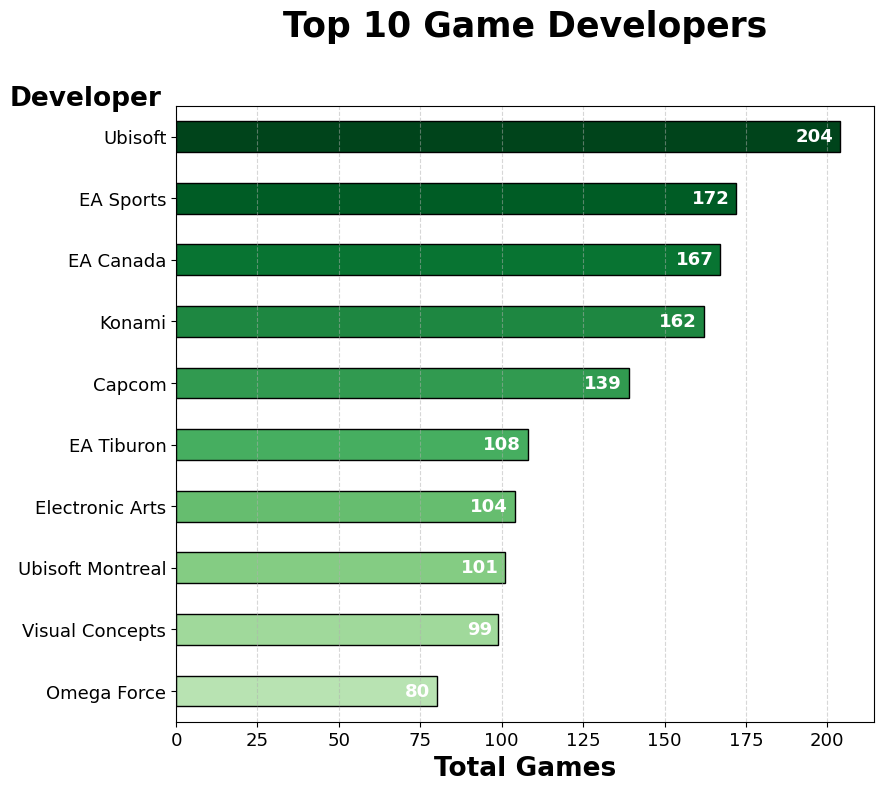

In [30]:
# Create a reversed green color gradient for the bars
colors = cm.Greens(np.linspace(0.3, 1, len(top_3_developers)))[::-1]
plt.figure(figsize=(9, 8))

# Create a horizontal bar chart using the top developers data
ax = top_3_developers.plot(kind='barh', color=colors, edgecolor="black")

# Annotate each bar with its value (number of games)
for i, v in enumerate(top_3_developers):
    ax.text(v - 2, i, str(round(v, 2)), color='white', ha='right', va='center', fontsize=13, fontweight='bold')

plt.title('Top 10 Game Developers', fontsize=25, fontweight='bold', pad=50)
plt.xlabel('Total Games', fontsize=19, fontweight='bold')

# Remove default y-axis label (it’s empty anyway)
ax.set_ylabel("")

# Manually add a "Developer" label to the left of the char
plt.text(-max(top_3_developers) * 0.25, -0.5, "Developer", fontsize=19, fontweight='bold')

plt.gca().invert_yaxis()

# Add a dashed grid only along the x-axis for readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust y-axis label position and rotation
ax.yaxis.label.set_position((100, 1))
ax.yaxis.label.set_rotation(0)

# Customize tick label sizes for better readability
ax.tick_params(axis='x', labelsize=13) 
ax.tick_params(axis='y', labelsize=13)

plt.show()

# Does the platform influence user ratings?

In [32]:
# how many games each platform has
platform_counts = df['Platform'].value_counts()

print(platform_counts)

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [33]:
df_anova = df.copy()

# Remove NaNs and convert to numeric
df_anova = df_anova.dropna(subset=['User_Score', 'Platform'])
df_anova['User_Score'] = pd.to_numeric(df_anova['User_Score'], errors='coerce')
df_anova = df_anova.dropna(subset=['User_Score'])

# count how many games there are per platform
platform_counts = df_anova['Platform'].value_counts()
print(platform_counts)

Platform
PS2     1241
X360     966
PS3      877
PC       770
XB       586
Wii      560
DS       516
PSP      421
GC       366
PS4      257
GBA      255
XOne     182
3DS      174
PS       162
PSV      143
WiiU     100
DC        14
Name: count, dtype: int64


In [34]:
# Select only platforms with enough data (e.g., at least 100 games)
valid_platforms = platform_counts[platform_counts >= 100].index
df_anova = df_anova[df_anova['Platform'].isin(valid_platforms)]


In [35]:
df_anova.groupby("Platform")["User_Score"].median().sort_index()

Platform
3DS     7.10
DS      7.40
GBA     8.00
GC      7.95
PC      7.50
PS      8.30
PS2     8.00
PS3     7.10
PS4     7.00
PSP     7.50
PSV     7.60
Wii     7.15
WiiU    7.10
X360    7.00
XB      8.00
XOne    6.80
Name: User_Score, dtype: float64

F-statistic: 37.995
P-value: 0.0000
→ There are statistically significant differences between the platforms.


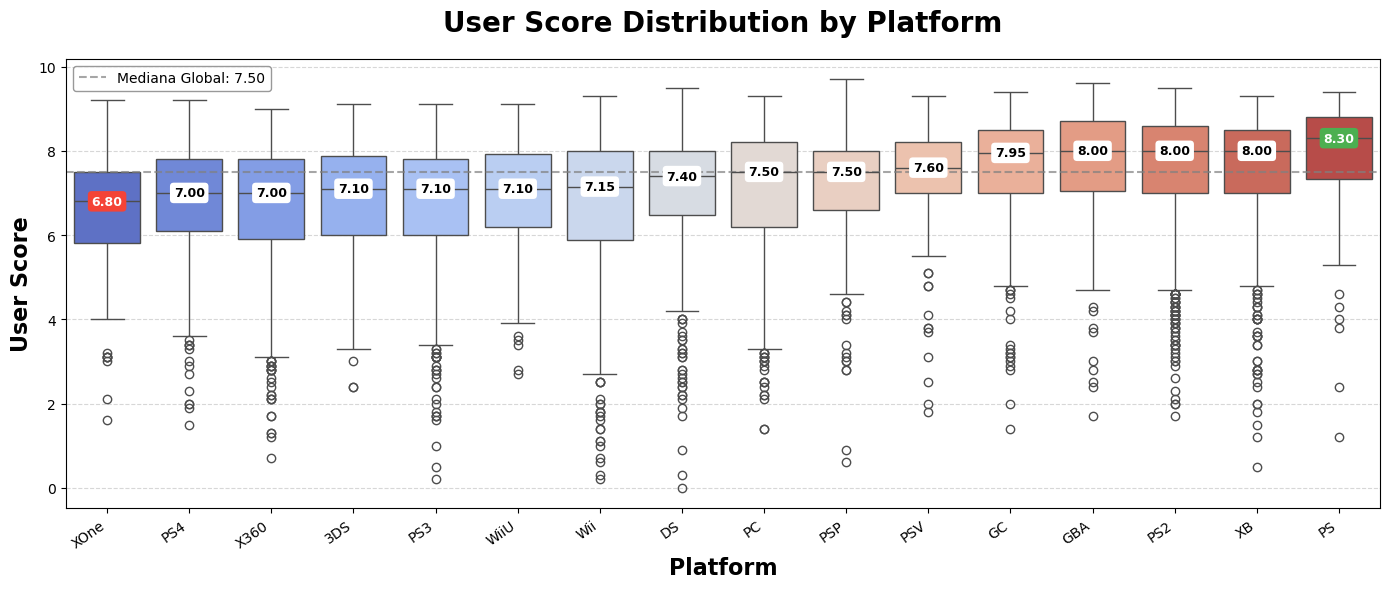

In [36]:
# Prepare groups for the ANOVA test
groups = [group["User_Score"].values for name, group in df_anova.groupby("Platform")]
# Run ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("→ There are statistically significant differences between the platforms.")
else:
    print("→ There are no significant differences between the platforms.")

# Calculate median User_Score per platform and sort them
platform_medians = df_anova.groupby("Platform")["User_Score"].median().sort_values()

plt.figure(figsize=(14, 6))

# Create a custom color palette based on number of platforms
colors = sns.color_palette("coolwarm", n_colors=len(platform_medians))

# Create boxplot of User Scores by platform, ordered by median
ax = sns.boxplot(data=df_anova, x='Platform', y='User_Score',order=platform_medians.index, palette=colors)

# Identify platforms with highest and lowest medians
max_platform = platform_medians.idxmax()
min_platform = platform_medians.idxmin()

# Annotate each boxplot with its median score
for i, platform in enumerate(platform_medians.index):
    median_val = platform_medians[platform]
    color = "black"
    bgcolor = "white"

    if platform == max_platform:
        bgcolor = "#4CAF50"  # Green (Best one) 
        color = "white"
    elif platform == min_platform:
        bgcolor = "#F44336"  # Red (Worse one)
        color = "white"
        
    # Draw median annotation with background box
    plt.text(i, median_val, f"{median_val:.2f}", 
             ha='center', va='center', fontsize=9, fontweight='bold', 
             color=color, bbox=dict(facecolor=bgcolor, edgecolor='none', boxstyle='round,pad=0.3'))

# Draw horizontal line for overall median User Score
overall_median = df_anova["User_Score"].median()
plt.axhline(y=overall_median, color='gray', linestyle='--', alpha=0.7, label=f'Mediana Global: {overall_median:.2f}')

# Add legend explaining the horizontal line
plt.legend(loc='upper left', fontsize=10, frameon=True, facecolor='white', edgecolor='gray')

# Set chart title and axis labels
plt.title("User Score Distribution by Platform", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Platform", fontsize=16, fontweight='bold')
plt.ylabel("User Score", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=35, ha="right")

# Add horizontal grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Introduction

In order to optimize its sales strategy for the upcoming summer season, a retail company has hired our services to perform a comprehensive analysis of video game related data. The study is based on the dataset provided in the “vgsales.csv” file, which contains detailed information on titles, platforms, release years, genres, developers, publishers, scores and sales globally and by region.

This analysis has been structured in two main parts: in Part 1, a series of specific questions are answered using data cleaning, transformation and analysis techniques in Python, supported by static visualizations designed in Jupyter Notebook. In Part 2, a statistically relevant question is formulated, not included in the previous ones, which allows us to go deeper into the observed patterns and provide added value to the business strategy.

Throughout the work, each of the decisions taken is justified: from the selection and transformation of variables (data engineering), to the choice of the most appropriate types of visualization to represent the information in a clear, precise and accessible way. It also details aspects of visual design such as the use of colors, fonts, sizes, styles and layout of graphic elements, all with the aim of facilitating the interpretation of the results by the management team.

The approach adopted ensures not only to answer the questions posed, but also to generate actionable insights that contribute to a better understanding of the behavior of the video game market, thus supporting strategic decision making in a highly competitive business context.


# Part 1
## What are the top 5 publishers by global sales?  

Specific methods to engineer the data has been used due to requirement of accurate data. Using Python, rows were identified where the ‘Publisher’ column was empty or contained null values. It was decided that missing values would be replaced with the word ‘Unknown’ to avoid errors in clustering and further analysis. The objective was to determine the advertisers with the highest overall sales. To do this, the data needed to be grouped by advertiser and the overall sales summed to select the top 5. For clearer visualisation, sales values were rounded to whole numbers and a horizontal bar chart was used to visually compare sales. Value labels within the bars, a clear title, axis labels and a grid were added to improve readability. Colours, font sizes and alignment were adjusted for a visually appealing presentation.

A bar chart with horizontal direction has been used to show the top 5 publishers in terms of overall sales as it provides a direct visual comparison of the values of each of the publishers, it was also chosen for its ease of understanding, which makes it suitable for a wide audience and finally it provides clarity by emphasising the magnitude of the values of each of the publishers. 

A palette of blue colours was chosen to reflect an order in the ranking of the publishers, from first (dark blue) to fifth (light blue), this colour palette conveys neutrality and objectivity in presenting financial data. In each of these bars is the specific value of each bar in white which is highlighted by the blue background colour.

The title was created with a font size of 16 pixels and the bold font size expresses clearly the total global sales of the top 5 video game advertisers between 1980 and 2020, effectively conveying the message to the audience.

Labels were chosen to identify the Publisher on the y-axis and a range of total sales on the x-axis, both of which are horizontal for quick reading. Finally, a grid was used to differentiate all points on the x-axis to emphasise the magnitude of each bar.

## Is there a correlation between the “na_sales” and “eu_sales” for the years 2010-2014?  

To answer the research question, it was necessary to work only with the relevant data, for instance, those with valid values for the year of release. Therefore, a filtering was applied by eliminating the null values (dropna) in the Year_of_Release column. Then, that column was converted to integer type (astype(int)) to allow filtering easily the years between 2010 and 2014. Through a Boolean condition, only records belonging to that range of years were selected. Finally, for each individual year, the correlation between NA_Sales and EU_Sales was calculated. This was done using the .corr() method of pandas within a loop that traverses each unique year in the dataset. The objective was to determine if there is a consistent linear relationship between sales in both regions over time.

A bubble chart scatter plot was used because it allows multiple dimensions to be represented at the same time (Yi, 2025). For instance, the X-axis represents sales in North America (NA_Sales). The Y-axis represents sales in Europe (EU_Sales). The color of each point indicates the year of release, which helps to visually compare how the correlation varies between years. The size of the bubbles reflects the global sales (Global Sales), also allowing to observe the magnitude of the commercial success of each game.

In addition, a box with the correlation values for each year was added at the top left, which makes it easier to directly interpret whether the relationship between the variables was high, moderate or low in different periods.

The “viridis” palette was used because of its good visual perception and because it is accessible to people with color blindness. The size of the figure was adjusted to (12.8) to give enough space to the graph and avoid crowding. Bold labels (fontweight='bold') were placed for the title and axes, improving legibility. Axis titles specify that sales are in millions, giving immediate numerical context to the reader. A subtle grid (alpha=0.5) was included to facilitate reading the values without overloading the image. A text with the correlations was placed in the upper left corner with a semi-transparent white background to highlight it without obscuring important data. The legend was corrected to clearly show the years and overall sales, and was positioned to the right so as not to overlap with the dots.

## What is the distribution of the 3 most popular (by user_score) game genres?  

In order to analyse the distribution of user ratings across the three most popular game genres, it was necessary to clean and process the data efficiently. Rows where User_Score was "NaN" were removed to ensure that only valid ratings were analysed and missing values in the Genre column were replaced with ‘Unknown’ to maintain consistency in the dataset. After this, it has been ensured that the values in User_Score were numeric to avoid errors when displaying them. Finally, the average of the user ratings have been calculated for each gender and selected the three with the best scores.

A stacked histogram has been used because it allows us to visualize how game ratings are distributed across genres and shows the number of users who assigned each score. This helps identify trends, such as most games receiving ratings between 7 and 9. By stacking the bars instead of plotting separate histograms, which would be more difficult to compare, the stacking gives a clear cumulative view of the ratings allowing to interpret the trends of each genre more intuitively while keeping the graph simple and effective.

The Viridis colour palette was chosen because accoording to (Rudis, Ross and Garnier, 2024), "Viridis provides a series of color maps that are designed to improve graph readability for readers with common forms of color blindness and/or color vision deficiency.", This also offers a good contrast between categories and makes the chart more accessible to the audience.

The title has been set as ‘Distribution of the 3 most popular game genres according to gamers’, which makes it clear to the public, with a font size of 18px and bold, and an extra margin for highlighting. Axis x and y labels have been set with fontsize of 15px and bold, and the axis Y label "Users" was set horizontally for better readability.

A legend was positioned inside the graph (top left corner) to optimise space without sacrificing visibility and to show the corresponding colour for each graph. Finally, dotted horizontal grid lines were inserted to improve readability without overloading the display.

## Do older games (2005 and earlier) have a higher MEDIAN “eu_sales” than newer games (after 2005)?  

Python was used to process the European sales data in order to obtain a clear comparison between games released in 2005 and before, versus those released after 2005. A copy of the original Dataset was created to avoid modifying the original data. Sales were transformed into millions to work with more representative figures. The data was filtered into two categories: Games released in 2005 or earlier and Games released after 2005. The median of sales in each group was calculated instead of the mean. These methods ensure accuracy and relevance in the comparison, allowing changes in video game sales between the two eras to be detected.

A vertical bar chart was used because it facilitates direct comparison of the median sales between the two categories of games which makes the difference evident. In addition, the large difference in height between the bars visually reinforces the drop in median sales of the newer games.

Several design choices were made to improve the comprehensibility of the graphic. For example, blue was used for the old games and orange for the new ones, which provides a clear contrast and makes the comparison intuitive because they are complementary colours, and for colour blind audiences these colours make it accessible.

The title has been set as "Comparison of Median EU Sales for Older and Newer Games" and large with a fontsize of 16 and bold to emphasise the theme of the graphic. The label ‘Median EU Sales’ is bold and positioned to the left to highlight the variable represented. Grid lines were added to make it easier to read the bar heights without overloading the chart.

The Median values were placed in white and bold within each bar, which improves readability and avoids the need to inspect the Y-axis.

A legend was added at the top right to explain the colours of the bars and their meaning as a variable to avoid confusion.

## What are the 3 most common “developer” in the dataset?  

To ensure accurate and meaningful data analysis, specific data processing steps were applied. First, any rows in the dataset where the "Developer" column contained missing or null values were removed, ensuring only relevant data was used. The goal was to identify the three most common developers in the dataset based on the number of games they developed. To achieve this, the dataset was grouped by developer, and the total number of games for each developer was counted. The top 3 developers with the highest number of games were then selected for visualization. A copy of the original dataset was created to avoid modifying the raw data, and null values were explicitly removed instead of being replaced, as missing developer names would not contribute meaningfully to the analysis.

A horizontal bar chart was chosen to represent the top 10 developers to obtain the top 3 most common developers because it compares the number of games among developers. It also provides a clear and structured ranking from highest to lowest and, finally, makes it easier for the viewer to understand the relative differences between developers. In conclusion, Ubisoft, EA Sport and EA Canada are the most common.

Color Palette: A gradient of green was used (cm.Greens), where the lightest green represents the lowest ranked developer and the darkest green represents the top developer. This creates a clear ranking effect.

The title is bold, placed at the top with a font size of 25px, ensuring the viewer immediately understands the chart’s purpose.The x-axis is labeled "Total Games" to clarify what is being measured. The y-axis label was removed for a cleaner look, and a separate "Developer" label was placed on the left for clarity. The values inside the bars are in bold white text to ensure they contrast well against the background.

A subtle dashed grid on the x-axis was added to help estimate values while keeping the design clean. The y-axis was inverted to list the top developer at the top for an intuitive ranking. Labels and axis ticks were adjusted to 13px - 19px to ensure readability without cluttering the visualization.

# Part 2

## Does the platform influence user ratings?

To reliably answer the question, it was first necessary to prepare and clean the data properly. With the help of Python, any rows where key information (User_Score or Platform) was missing were removed, ensuring that only valid data was included. The User_Score column was originally in object format, so it was converted to numeric format ensuring that the data was compatible with the statistical analysis. ANOVA was used as the statistical analysis tool and only platforms with at least 100 games were considered. This avoids biased results that could occur due to small sample sizes. Finally, data were pooled by platform and scores were extracted for each group, which were then passed to stats.f_oneway() function to run a single-factor ANOVA test, ideal for comparing means between multiple independent groups.

A boxplot was ideal to visualise the distribution of values by category. This graph allows to observe the median of each platform (line within the box), the dispersion (interquartile range and extreme values) and also outliers, which in this case are common to all platforms. The boxplot is suitable to complement the ANOVA result. Although ANOVA only tells us if there are significant differences between means, the boxplot allows us to visually see how the entire distribution varies by platform. In addition, an overall median line was added to provide a quick visual reference point on how each platform stands in relation to the overall average.

The graphic was designed with both clarity and visual impact in mind:

The colour palette (coolwarm) was chosen so that cool colours represent platforms with lower scores and warm colours the highest, intuitively conveying performance.

Special colours were implemented in the medians and labels within each box to distinguish the extremes and highlight the exact median value, green for the platform with the best median (PS, 8.30), red for the worst (XOne, 6.80) and white for those in the middle. A dashed global median line was placed allowing each platform to be visually compared with the overall median value. The large bold font for the title and axes (fontsize=16-20), ideal for presentations. The X-axis labels were rotated to avoid overlapping (35°) and finally a legend was placed in the top left corner, away from the data.

The question ‘Does platform influence user ratings?’ seeks to identify whether there are real differences in user perception depending on which console a game is released on.

The ANOVA analysis yielded a very clear result:
F-statistic: 37.995 - P-value: 0.0000,
indicating that there are statistically significant differences between platforms.

However, knowing that there are differences is not enough on its own, hence the visualisation clearly shows which platforms tend to have higher or lower scores, how those values are distributed and how many outliers there are.

For example:

PS stands out as the platform with the best median score (8.30), well above the overall average. In contrast, XOne has the lowest (6.80), which may invite to explore possible causes: user experience, quality of titles, higher expectations? Some platforms such as PS4, X360 or 3DS show low median and significant presence of outliers, suggesting more variability in user perception. This visualisation not only answers the question, but opens the door to further research, such as:

Which genres dominate the top-scoring platforms?

Does the year of release play a role?

Is there a bias in user ratings by platform?

# Conclusion

This project has provided a comprehensive analytical study of sales dynamics and user perception in the video games industry, using the ‘vgsales.csv’ dataset as a basis. By dividing the analysis into two main parts, specific commercially relevant questions were answered.

In Part 1, robust data cleaning and transformation techniques were applied to ensure accuracy and consistency of variables. Subsequently, static and custom-designed visualisations were used to answer key questions about publishers, sales correlations, genre popularity, frequent developers and cross-generational sales trends. Each graphic was designed with intention, prioritising clarity, accessibility and ease of interpretation through effective colour palettes, thoughtful visual layout and descriptive labels.

In Part 2, research was conducted statistically to determine whether the platform influences user ratings. Through ANOVA analysis and a visually enriched boxplot, it was confirmed that there are significant differences between platforms. This visualisation not only directly answered the question, but also revealed deeper patterns in user perception and raised new lines of research.

Throughout the analysis, each analytical and design decision was accompanied by a clear rationale, from the choice of the median on skewed data, to the use of colours accessible to all audiences. These decisions enabled actionable insights to be generated that can directly guide the company's sales strategy for the summer season. Understanding which platforms and genres users prefer, how sales behave by region, and what impact publishers or developers have on the market, provides a solid foundation for effective strategic planning.

# References

Rudis, B., Ross, N. and Garnier, S. (2024). The viridis color palettes. [online] cran.r-project.org. Available at: https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html.

Yi, M. (2025). A Complete Guide to Bubble Charts. [online] Atlassian. Available at: https://www.atlassian.com/data/charts/bubble-chart-complete-guide.
